In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

# constants
bounds = (-500,500)

For executing it, just run all the cells in order

In [2]:
class particle():
    def __init__(self,name,pos,velocity):
        self.name = name
        self.pos = pos
        self.velocity = velocity
        self.personal_best_pos = pos

    def set_global_best(self, pos):
        self.global_best = pos

    def check_if_in_bounds(self):
        for i in range(2):
            if self.pos[i] > 500:
                self.pos[i] = 500
            if self.pos[i] < -500:
                self.pos[i] = -500
        
    def move(self):
        self.pos = self.pos + self.velocity
        self.check_if_in_bounds()

    def fitness(self):
        fitness = 0
        for coord in self.pos:
            fitness = fitness + (-coord * math.sin(math.sqrt(abs(coord)))) 
        return fitness

    def update(self, momentum=1, alpha1=1, alpha2=1, r1=.5, r2=.5):
        self.velocity = momentum * self.velocity + r1*alpha1*(self.personal_best_pos - self.pos) + r2*alpha2*(self.global_best - self.pos)
        self.move()

def coord_fitness(coordinates):
        fitness = 0
        for coord in coordinates:
            fitness = fitness + (-coord * math.sin(math.sqrt(abs(coord)))) 
        return fitness

v1 = np.array([50,50])

particles = [
    particle("x_1",np.array([-400,-400]),v1),
    particle("x_2",np.array([-410,-410]),v1),
    particle("x_3",np.array([-415,-415]),v1)
    ]

for p in particles:
    p.set_global_best(particles[2].pos)
 



### A

In [3]:
for p in particles:
    print(f"Fitness of particle {p.name} is {p.fitness()}")


Fitness of particle x_1 is 730.3562005821021
Fitness of particle x_2 is 807.9150929576671
Fitness of particle x_3 is 829.0117583869608


### B


Momentum = 2:
Next position of particle x_1 will be [-307.5 -307.5] with fitness -594.8142409658482
Next position of particle x_2 will be [-312.5 -312.5] with fitness -575.9280862711123
Next position of particle x_3 will be [-315. -315.] with fitness -561.8363811214956

Momentum = 0.5:
Next position of particle x_1 will be [-361.25 -361.25] with fitness 112.98269335704535
Next position of particle x_2 will be [-363.75 -363.75] with fitness 160.66078071047627
Next position of particle x_3 will be [-365. -365.] with fitness 184.43387736965266

Momentum = 0.1:
Next position of particle x_1 will be [-403.625 -403.625] with fitness 763.7105604626043
Next position of particle x_2 will be [-407.875 -407.875] with fitness 795.2906649877904
Next position of particle x_3 will be [-410. -410.] with fitness 807.9150929576671


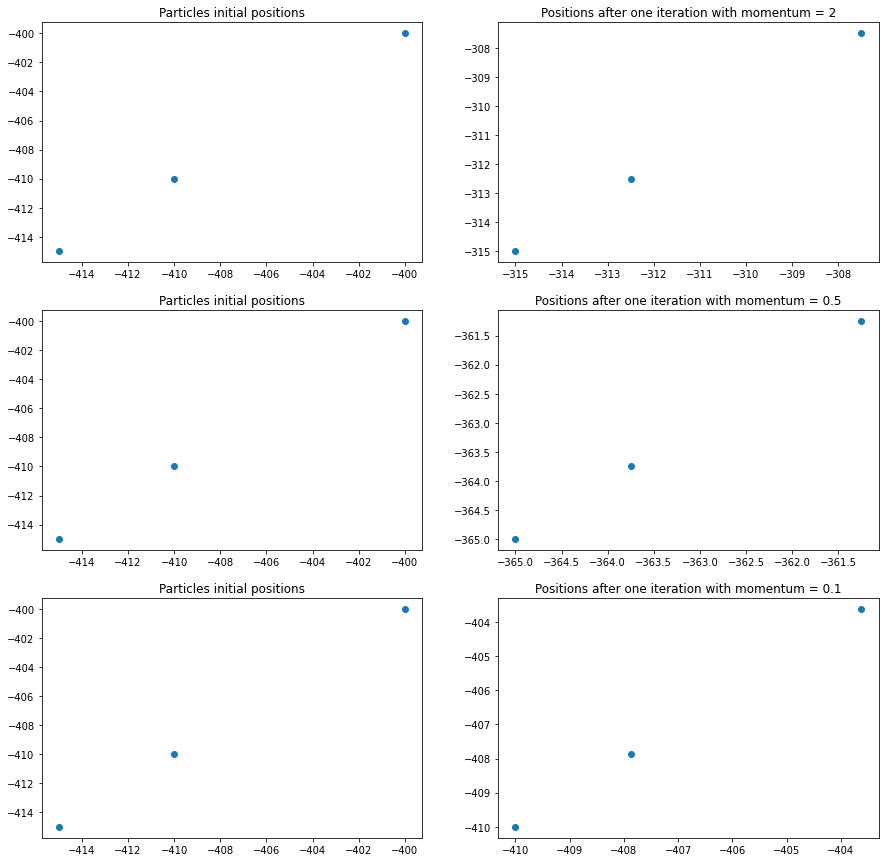

In [4]:
final_pos_x = [[-400,-410,-415],[],[],[]]
final_pos_y = [[-400,-410,-415],[],[],[]]
i=1

for w in [2, 0.5, 0.1]:
    print(f"\nMomentum = {w}:")
    for p in particles:

        initial_position = p.pos
        p.update(w)
        print(f"Next position of particle {p.name} will be {p.pos} with fitness {p.fitness()}")
        final_pos_x[i].append(p.pos[0])
        final_pos_y[i].append(p.pos[1])
        p.pos = initial_position
    i = i+1


fig, axs = plt.subplots(3,2,figsize=(15,15))
i = 0
for w in [2, 0.5, 0.1]:
    axs[i][0].scatter(final_pos_x[0],final_pos_y[0])
    axs[i][1].scatter(final_pos_x[i+1],final_pos_y[i+1])

    axs[i][0].set_title("Particles initial positions")
    axs[i][1].set_title(f"Positions after one iteration with momentum = {w}")

    i=i+1

### C

The momentum has the function to "tune" the position of the particles. If it's <1, the best particle will be decreasing its velocity while it's approaxing a better position. If it's >1, the particle will be accelerating constantly.

### D

If we have a higher w, the particles will be moving faster, so it'd be easier to find the optimum if it's far away from the initial position, but it'll be hard to adjust it perfectly in a few iterations, so the computation will take longer.
On the other hand if we have a low momentum the particles would be able to adjust well to the optimum, but they may stop before reaching it (We can see this in Exercise 2.c).